In [62]:
import pandas as pd
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [101]:
btc=pd.read_csv('btc.csv')

In [102]:
btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [103]:
btc['Date'] = [datetime.strptime(x,'%Y-%m-%d') for x in btc['Date']]
btc = btc.set_index('Date')
btc.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


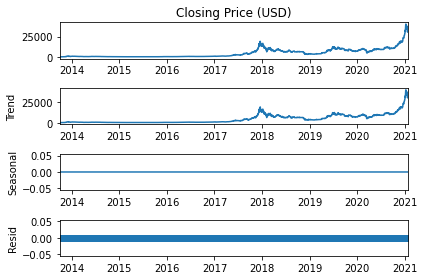

<Figure size 1080x864 with 0 Axes>

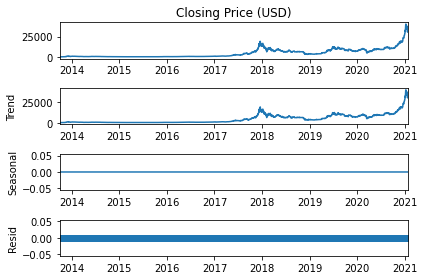

In [104]:
plt.figure(figsize=(15,12))
series = btc["Closing Price (USD)"]
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [105]:
daily_data_fb = btc.reset_index()[['Date','Closing Price (USD)']].rename({'Date':'ds','Closing Price (USD)':'y'}, axis=1)
daily_data_fb.head()

,ds,y
0,2013-10-01,123.65499
1,2013-10-02,125.45500
2,2013-10-03,108.58483
3,2013-10-04,118.67466
4,2013-10-05,121.33866


In [106]:
model = Prophet()
model.fit(daily_data_fb)
future = model.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
3021,2022-01-19
3022,2022-01-20
3023,2022-01-21
3024,2022-01-22
3025,2022-01-23


In [107]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-10-01,-294.932128,-3401.328602,2885.486631
1,2013-10-02,-320.380993,-3360.755300,2720.729265
2,2013-10-03,-312.438119,-3402.759698,2878.510707
3,2013-10-04,-336.534511,-3411.538527,2874.847783
4,2013-10-05,-325.862559,-3427.656465,2702.373635


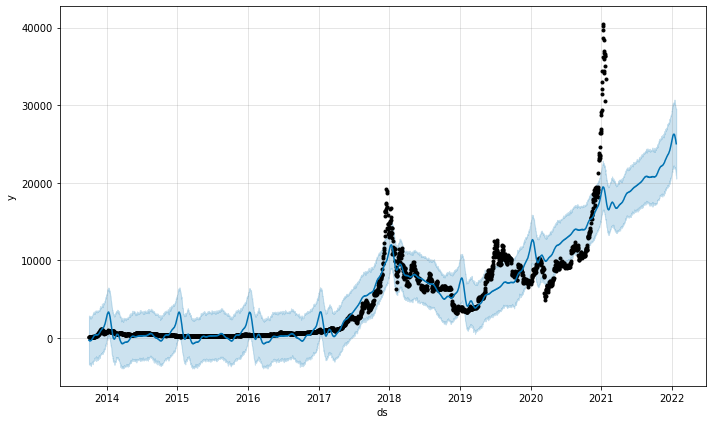

In [108]:
fig1=model.plot(forecast)

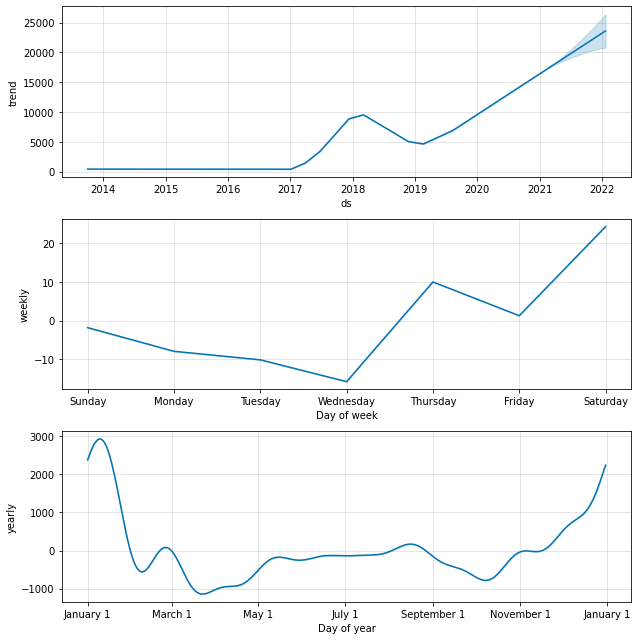

In [109]:
fig2 = model.plot_components(forecast)